In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embs = torch.load('../embeddings/audio/raw_wav2vec2.pt')

In [3]:
train_loader, test_loader = train_test_dataloader(embs)

In [4]:
model = MLP(input_dim = 1024, hidden_dims = [256], output_dim = 6, dropout = 0.1).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50

PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'train_loader': train_loader,
          'test_loader': test_loader,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
results = train_model(**PARAMS)

Epoch 5/50
Train Loss: 1.2744,                    Train Accuracy: 0.4892,                    Train Precision: 0.4786,                    Train Recall 0.4892.
Val Loss: 1.2511,                    Val Accuracy: 0.5205,                    Val Precision: 0.5291,                    Val Recall: 0.5205.
--------------------------------------------------


Epoch 10/50
Train Loss: 1.1805,                    Train Accuracy: 0.5385,                    Train Precision: 0.5327,                    Train Recall 0.5385.
Val Loss: 1.2356,                    Val Accuracy: 0.5212,                    Val Precision: 0.5544,                    Val Recall: 0.5212.
--------------------------------------------------


Epoch 15/50
Train Loss: 1.1146,                    Train Accuracy: 0.5684,                    Train Precision: 0.5638,                    Train Recall 0.5684.
Val Loss: 1.1815,                    Val Accuracy: 0.5588,                    Val Precision: 0.6215,                    Val Recall: 0.5588.
--------------------------------------------------


Epoch 20/50
Train Loss: 1.0608,                    Train Accuracy: 0.5939,                    Train Precision: 0.5899,                    Train Recall 0.5939.
Val Loss: 1.0973,                    Val Accuracy: 0.5856,                    Val Precision: 0.6081,                    Val Recall: 0.5856.
--------------------------------------------------


Epoch 25/50
Train Loss: 1.0249,                    Train Accuracy: 0.6033,                    Train Precision: 0.6002,                    Train Recall 0.6033.
Val Loss: 1.0223,                    Val Accuracy: 0.6320,                    Val Precision: 0.6290,                    Val Recall: 0.6320.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.9977,                    Train Accuracy: 0.6216,                    Train Precision: 0.6186,                    Train Recall 0.6216.
Val Loss: 1.0235,                    Val Accuracy: 0.6064,                    Val Precision: 0.6170,                    Val Recall: 0.6064.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.9854,                    Train Accuracy: 0.6247,                    Train Precision: 0.6220,                    Train Recall 0.6247.
Val Loss: 1.0655,                    Val Accuracy: 0.5970,                    Val Precision: 0.6309,                    Val Recall: 0.5970.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.9423,                    Train Accuracy: 0.6393,                    Train Precision: 0.6377,                    Train Recall 0.6393.
Val Loss: 0.9836,                    Val Accuracy: 0.6441,                    Val Precision: 0.6516,                    Val Recall: 0.6441.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.9370,                    Train Accuracy: 0.6381,                    Train Precision: 0.6355,                    Train Recall 0.6381.
Val Loss: 0.9906,                    Val Accuracy: 0.6286,                    Val Precision: 0.6481,                    Val Recall: 0.6286.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.9129,                    Train Accuracy: 0.6517,                    Train Precision: 0.6501,                    Train Recall 0.6517.
Val Loss: 0.9773,                    Val Accuracy: 0.6340,                    Val Precision: 0.6491,                    Val Recall: 0.6340.
--------------------------------------------------
BEST EPOCH: 39.00          BEST ACCURACY: 0.64          BEST PRECISION: 0.65          BEST RECALL: 0.64


In [6]:
epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = results

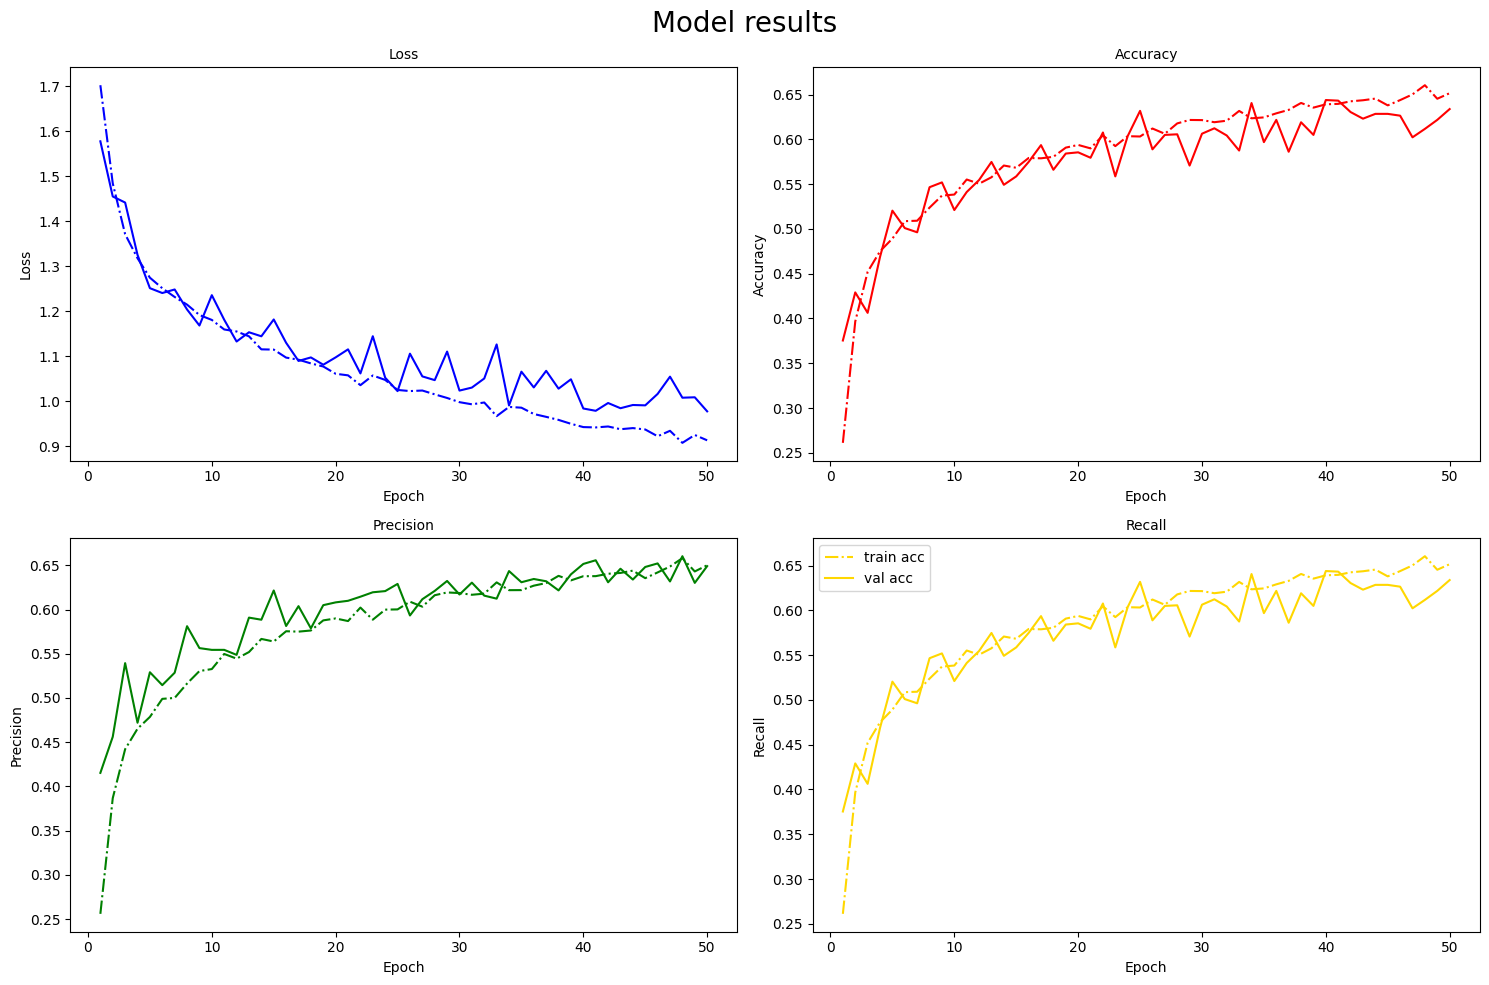

In [7]:
plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

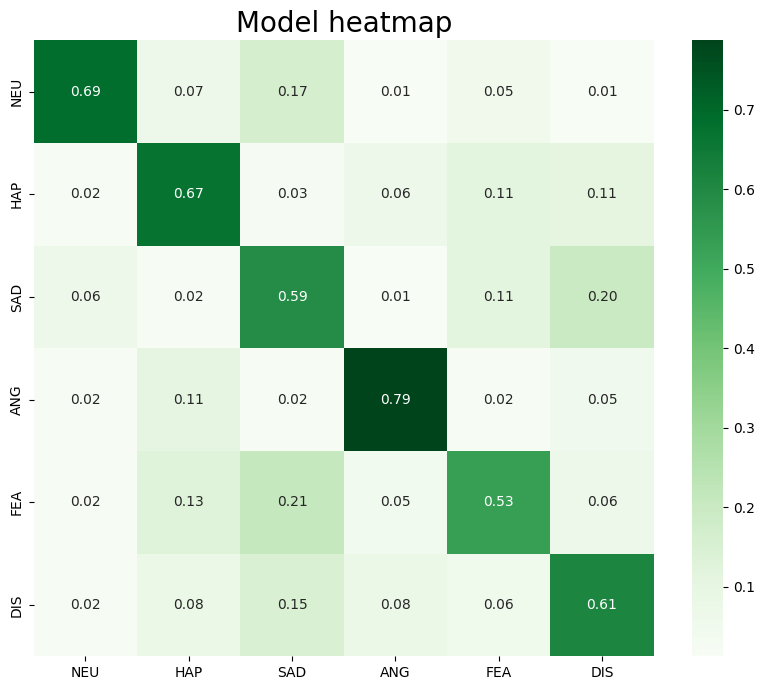

In [8]:
plot_confusion_matrix(cm)